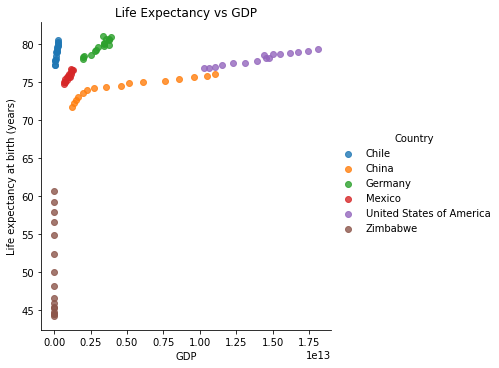

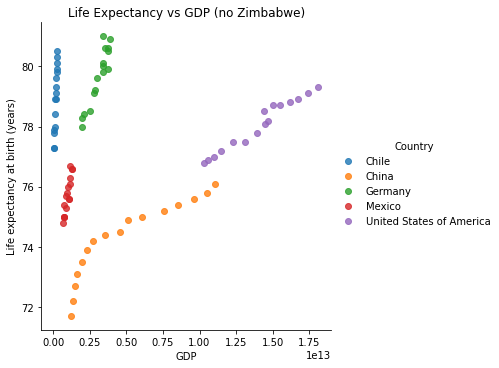

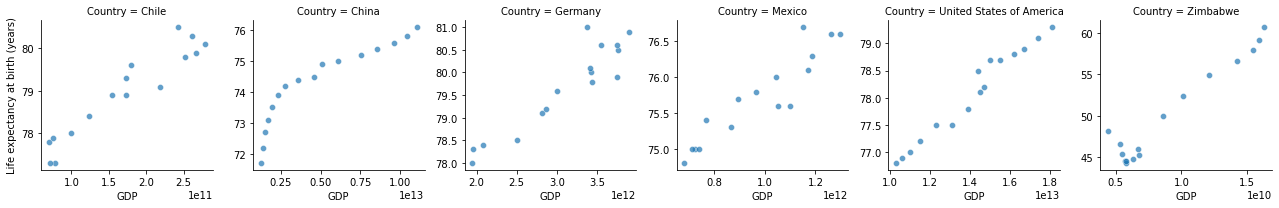

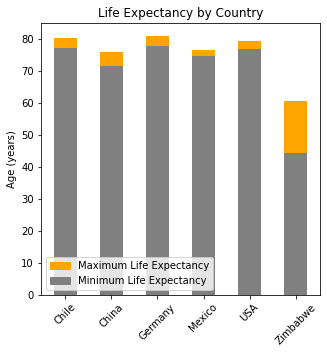

<Figure size 432x288 with 0 Axes>

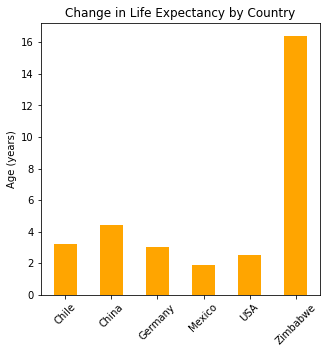

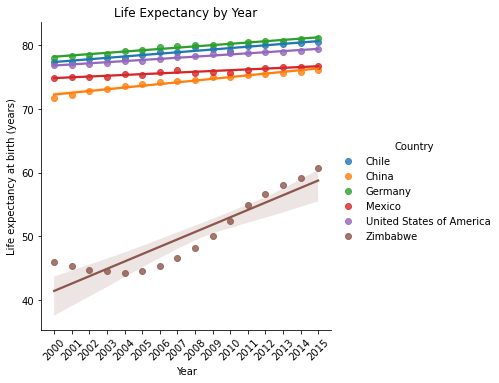

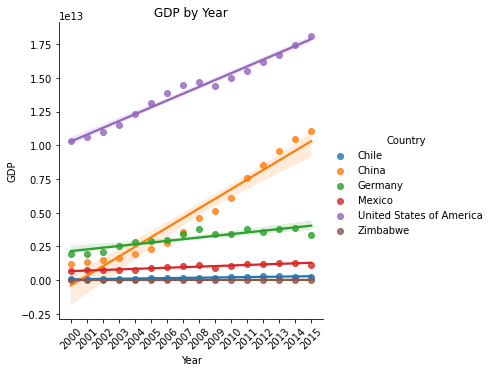

In [180]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# import the csv as a dataframe
df = pd.read_csv('all_data.csv')

#make a smaller selection of data by country, as needed
notzimbabwe = df.loc[df["Country"] != "Zimbabwe"]

#Life expectancy vs GDP for full data set
sns.lmplot(x="GDP", y="Life expectancy at birth (years)", data = df, hue = "Country", fit_reg = False)
plt.title("Life Expectancy vs GDP")
plt.savefig('full_lifevsGDP.png')

#took zimbabwe out of the data set, b/c the GDP is so much lower.
sns.lmplot(x="GDP", y="Life expectancy at birth (years)", data = notzimbabwe, hue = "Country", fit_reg = False)
plt.title("Life Expectancy vs GDP (no Zimbabwe)")
plt.savefig('nozimb_lifevsGDP.png')

# graphing the countries next to each other, not sharing the same x or y axis
g = sns.FacetGrid(df, col="Country", sharex=False, sharey=False)
g.map(sns.scatterplot, "GDP", "Life expectancy at birth (years)", alpha=.7)
plt.savefig('individualcountries_lifevsGDP.png')

#graphing the mins & maxes of life expectancy
#first make a list of max and mins
lifemins = [df.loc[df["Country"] == country]["Life expectancy at birth (years)"].min() for country in pd.unique(df["Country"])]
lifemaxes = [df.loc[df["Country"] == country]["Life expectancy at birth (years)"].max() for country in pd.unique(df["Country"])]

#maxes - mins of life expectancy    
diffs = [lifemaxes[i] - lifemins[i] for i in range(len(lifemins))]

#list of countries in alphabetical order
countries = pd.unique(df["Country"])
countries[4] = "USA"
xvals = [i for i in range(len(lifemins))]

#plotting the life expectancies by country as stacked bar graph, minimum and maximum (diff)
plt.figure(figsize = (5,5))
ax = plt.subplot()
plt.bar(xvals, lifemins, width = .5, color = 'gray')
plt.bar(xvals, diffs, bottom = lifemins, width = .5, color = 'orange')
ax.set_xticks(xvals)
ax.set_xticklabels(countries, rotation = 45)
ages = {'Maximum Life Expectancy':'orange', 'Minimum Life Expectancy':'gray'}         
labels = list(ages.keys())
handles = [plt.Rectangle((0,0),1,1, color=ages[label]) for label in labels]
plt.legend(handles, labels)
plt.title("Life Expectancy by Country")
plt.ylabel("Age (years)")
plt.savefig('stackedbarlifeexpectancy.png')
plt.show()
plt.clf()

#plotting only the difference between max and min life expectancies (the change in expectancy)
plt.figure(figsize = (5,5))
ax = plt.subplot()
plt.bar(xvals, diffs, width = .5, color = 'orange')
ax.set_xticks(xvals)
ax.set_xticklabels(countries, rotation = 45)
plt.title("Change in Life Expectancy by Country")
plt.ylabel("Age (years)")
plt.savefig('lifeexpectancydiffs.png')
plt.show()

#Life expectancy by year for full data set
years = pd.unique(df["Year"])
graph1 = sns.lmplot(x="Year", y="Life expectancy at birth (years)", data = df, hue = "Country", fit_reg = True)
graph1.ax.set_xticks(years)
graph1.ax.set_xticklabels(years, rotation = 45)
plt.title("Life Expectancy by Year")
plt.savefig('lifeexpectancybyyear.png')

#GDP by year for full data set
graph2 = sns.lmplot(x="Year", y="GDP", data = df, hue = "Country", fit_reg = True)
graph2.ax.set_xticks(years)
graph2.ax.set_xticklabels(years, rotation = 45)
plt.title("GDP by Year")
plt.savefig('gdpbyyear.png')


#Question: Why do Chile and Zimbabwe have lower GDPs but largely dissimilar life expectancies??
#Question: What happened in Zimbabwe in the early 2000s?
#Question: Why is GDP in USA so high, but life expectancy is lower than Germany?
